In [31]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset"

In [32]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
classes = os.listdir(dir_path)
print(classes)

['test', 'train', 'fruit.h5']


In [33]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/train"
classes = os.listdir(dir_path)
print(classes)

['Apple___Black_rot', 'Peach___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Apple___healthy', 'Peach___Bacterial_spot']


In [34]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test"
classes = os.listdir(dir_path)
print(classes)

['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___healthy', 'Peach___Bacterial_spot']


In [35]:
train = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/train" 
test = "/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test"

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [38]:
x_train=train_datagen.flow_from_directory(train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [39]:
model=Sequential()

In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/fruit.h5')

In [42]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/03c4fb76-81ce-4430-9927-9df7aad2c9e3___RS_NLB 3602.JPG")

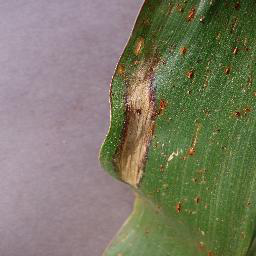

In [43]:
img

In [44]:
x=image.img_to_array(img)

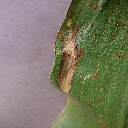

In [46]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/03c4fb76-81ce-4430-9927-9df7aad2c9e3___RS_NLB 3602.JPG",target_size=(128,128))
img

In [47]:
x=image.img_to_array(img)

In [48]:
x

array([[[168., 155., 172.],
        [164., 151., 168.],
        [162., 149., 166.],
        ...,
        [ 34.,  49.,  16.],
        [ 47.,  58.,  26.],
        [ 33.,  40.,   9.]],

       [[164., 151., 168.],
        [165., 152., 169.],
        [169., 156., 173.],
        ...,
        [ 40.,  56.,  20.],
        [ 24.,  35.,   1.],
        [ 49.,  59.,  25.]],

       [[172., 159., 176.],
        [170., 157., 174.],
        [168., 155., 172.],
        ...,
        [ 48.,  64.,  28.],
        [ 38.,  49.,  15.],
        [ 43.,  54.,  20.]],

       ...,

       [[142., 125., 133.],
        [142., 125., 133.],
        [141., 124., 132.],
        ...,
        [ 54.,  62.,  25.],
        [ 50.,  58.,  21.],
        [ 59.,  67.,  30.]],

       [[142., 125., 133.],
        [139., 122., 130.],
        [142., 125., 133.],
        ...,
        [ 49.,  56.,  22.],
        [ 53.,  63.,  26.],
        [ 70.,  81.,  41.]],

       [[138., 121., 129.],
        [134., 117., 125.],
        [139., 1

In [49]:
x=np.expand_dims(x,axis=0)

In [50]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 155ms/step


In [51]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [55]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [56]:
index[y[0]]

'Corn_(maize)___healthy'

In [57]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/03c4fb76-81ce-4430-9927-9df7aad2c9e3___RS_NLB 3602.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 70ms/step


'Corn_(maize)___healthy'

In [58]:
test_datagen_1=ImageDataGenerator(rescale=1)
test_generator_1=test_datagen_1.flow_from_directory(
    test,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 1686 images belonging to 6 classes.


In [59]:
model.evaluate(test_generator_1,steps=50)

50/50 [==============================] - 126s 3s/step - loss: 187.9175 - accuracy: 0.7430


[187.91754150390625, 0.7429999709129333]